In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal


In [5]:
# Define parameters for each Gaussian component

# Means of the two components
mu1 = np.array([1, 1])
mu2 = np.array([3, 5])

# Covariance matrices of the two components
sigma1 = sigma2 = np.eye(2)

# Mixing proportion for the components
weight1 = 0.5
weight2 = 0.5


# 2. Generate samples from each distribution
n_samples = 500

# foo = [
#     multivariate_normal(mu1, sigma1, int(n_samples * weight1)),
#     multivariate_normal(mu2, sigma2, int(n_samples * weight2)),
# ]


In [6]:
weights = [weight1, weight2]

# Sample component indices
component_indices = np.random.choice([0, 1], size=n_samples, p=weights)

# Initialize array to hold samples
samples = np.zeros((n_samples, 2))

# Generate samples based on the component indices
samples[component_indices == 0] = np.random.multivariate_normal(
    mean=mu1, cov=sigma1, size=(component_indices == 0).sum()
)

samples[component_indices == 1] = np.random.multivariate_normal(
    mu2, sigma2, (component_indices == 1).sum()
)

# mixture_idx = np.random.choice(len(weights), size=n_samples, replace=True, p=weights)
# y = np.fromiter((foo(i).rvs(1) for i in mixture_idx), dtype=np.float64)


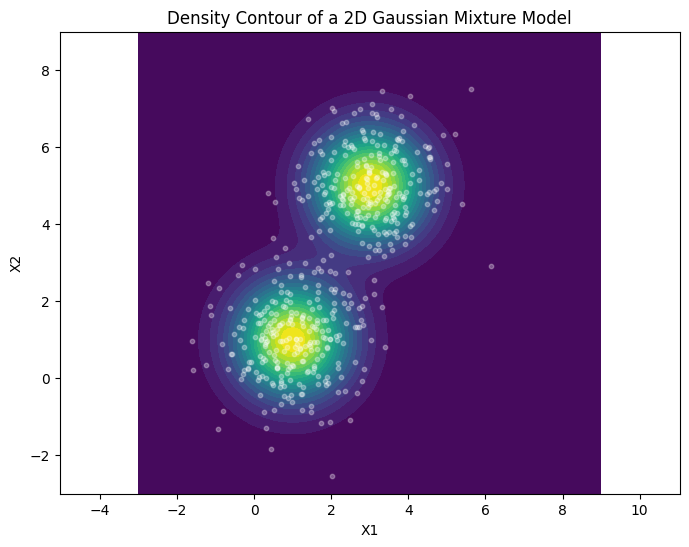

In [7]:
### **Visualizing the Density with Contour Plots**


# Define grid for plotting
x, y = np.mgrid[-3:9:0.01, -3:9:0.01]
pos = np.dstack((x, y))

# Compute the density for each component
rv1 = multivariate_normal(mu1, sigma1)
rv2 = multivariate_normal(mu2, sigma2)

# Compute the mixture density
z = weight1 * rv1.pdf(pos) + weight2 * rv2.pdf(pos)

# Plot the contour map and samples
plt.figure(figsize=(8, 6))
plt.contourf(x, y, z, levels=20, cmap="viridis")
plt.scatter(samples[:, 0], samples[:, 1], c="white", s=10, alpha=0.3)
plt.title("Density Contour of a 2D Gaussian Mixture Model")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")

plt.show()

In [8]:
import tensorflow_probability as tfp

tfd = tfp.distributions


In [9]:
pi = np.array([0.2, 0.3, 0.5], dtype=np.float32)
mu = np.array([[10, 10], [20, 20], [30, 30]], dtype=np.float32)
sigma = np.array([[1, 1], [2, 2], [3, 3]], dtype=np.float32)
mvgmm = tfd.MixtureSameFamily(
    mixture_distribution=tfd.Categorical(probs=pi),
    components_distribution=tfd.MultivariateNormalDiag(loc=mu, scale_diag=sigma),
)
x = np.linspace(5, 35, 100)
y = np.linspace(5, 35, 100)
x, y = np.meshgrid(x, y)
data = np.stack((x.flatten(), y.flatten()), axis=1)
prob = mvgmm.prob(data).numpy()
ax = plt.axes(projection="3d")
plt.contour(x, y, prob.reshape((100, 100)))
ax.plot_surface(x, y, prob.reshape((100, 100)), cmap="viridis");



Failed to import TF-Keras. Please note that TF-Keras is not installed by default when you install TensorFlow Probability. This is so that JAX-only users do not have to install TensorFlow or TF-Keras. To use TensorFlow Probability with TensorFlow, please install the tf-keras or tf-keras-nightly package.
This can be be done through installing the tensorflow-probability[tf] extra.




ModuleNotFoundError: No module named 'tf_keras'